# Helpful Reviews

### Comparative Exploratory Data Analysis

### Corey J Wade

## Introduction

This Jupyter Notebook will present comparative exploratory data analysis of an Amazon Book Reviews dataset courtesy of Julian McAuley, UCSD: 

http://jmcauley.ucsd.edu/data/amazon/

## Open Dataset

In [30]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Open DataFrame
df = pd.read_csv('df.csv', nrows=800000)

In [31]:
# View Full DataFrame
df.head()

,Unnamed: 0,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,...,Total_Votes,Helpful_Percentage,Review_Length,Sentence_Length,Word_Length,Helpful_Rating,Helpful_Votes_Scaled,Helpful_Percentage_Book_Score,Badge,Helpful?
0,0,1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,...,2,0.000000,268,9.800000,4.306122,0.010826,0.000000,0.541325,1,0
1,1,4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,...,9,0.777778,813,13.818182,4.260000,0.797675,0.836220,0.545366,4,1
2,2,14,000100039X,"[1, 1]",5.0,I discovered The Prophet fifty years ago in co...,"01 23, 2013",A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,...,1,1.000000,870,18.111111,4.148148,0.753353,0.434560,0.541903,4,1
3,3,15,000100039X,"[1, 1]",5.0,Can't say enough about Kahlil Gibran's work am...,"06 27, 2012",A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,...,1,1.000000,427,11.833333,4.845070,0.753353,0.434560,0.541903,4,1
4,4,17,000100039X,"[3, 5]",5.0,"Anything I've read by Gibran is, in my mind, f...","11 16, 2005",A2X4HE21JTAL98,Antiquarian,Flawless,...,5,0.600000,485,16.000000,4.775000,0.631986,0.678869,0.543059,3,0


In [32]:
# Delete extraneous column from all dataframes
del df['Unnamed: 0']

In [33]:
df.describe()

,index,overall,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage,Review_Length,Sentence_Length,Word_Length,Helpful_Rating,Helpful_Votes_Scaled,Helpful_Percentage_Book_Score,Badge,Helpful?
count,8.000000e+05,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,6.837444e+05,3.998100,1.242265e+09,6.811794,9.453746,0.686744,1231.753107,17.261253,4.525230,0.636134,0.571924,0.567461,3.289423,0.554860
std,3.944693e+05,1.234501,1.240996e+08,31.121249,36.164257,0.348146,1299.964482,6.398669,0.402506,0.280456,0.280038,0.056055,1.054078,0.496982
min,1.000000e+00,1.000000,8.480160e+08,0.000000,1.000000,0.000000,2.000000,0.315789,0.973684,0.010826,0.000000,0.541325,1.000000,0.000000
25%,3.356048e+05,3.000000,1.157414e+09,1.000000,1.000000,0.500000,380.000000,13.000000,4.267606,0.481169,0.434560,0.541988,3.000000,0.000000
50%,6.879685e+05,4.000000,1.271203e+09,2.000000,3.000000,0.800000,837.000000,16.615385,4.519481,0.753357,0.611893,0.545642,4.000000,1.000000
75%,1.012049e+06,5.000000,1.349395e+09,5.000000,8.000000,1.000000,1641.000000,20.666667,4.774554,0.827981,0.780913,0.562301,4.000000,1.000000
max,1.366947e+06,5.000000,1.405987e+09,7136.000000,7681.000000,1.000000,32578.000000,390.000000,23.600000,0.998411,0.999324,1.000000,6.000000,1.000000


Note that the median review ('overall') is 4.0. Over the entire dataset, it was 5.0. The mean is almost the same at 3.99.

Helpful_Votes and Total_Votes are very right skewed, like much of the data.

The Helpful Percentage has a mean of 0.686744, while the median is 0.8 indicating a left skewed distribution.

Other columns of interest include review lengths wit ha mean of 1231 words, sentence lengths wit a mean of 17 words, and word lengths with a mean of 4.5 characters.

Also note that most reviews are considered helpful.

## Overall Review Score Box Plot

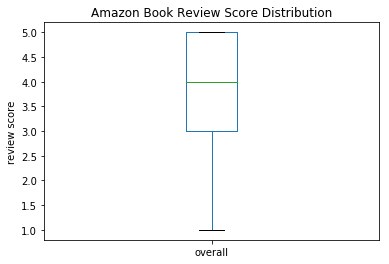

In [35]:
df.plot(y='overall', kind='box')
plt.ylabel('review score')
plt.title('Amazon Book Review Score Distribution')
plt.show()

Even though there are only 5 possible review scores, 2.0 and 1.0 are outliers! This is the definition of a top-heavy box. (I don't know if that's a real term.) 

## Overall Review Score Histogram

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


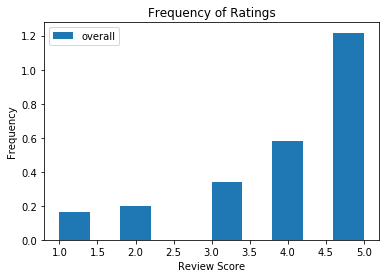

In [36]:
df.plot(y='overall', kind='hist', normed=True)
plt.xlabel('Review Score')
plt.title('Frequency of Ratings')
plt.show()

The bars make a nice curve. This histogram reinforces a top-heavy rating system.

## Overall ECDF

In [37]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0.5,1,'Frequency of Ratings')

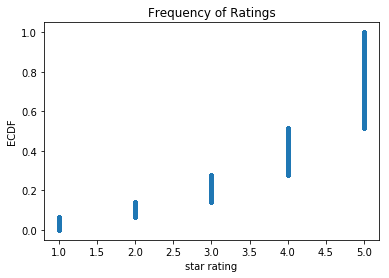

In [38]:
# Compute ECDF for star rating
x, y = ecdf(df.overall)

# Generate plot
plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
plt.xlabel('star rating')
plt.ylabel('ECDF')
plt.title('Frequency of Ratings')

The ECDF is a little more telling that the histogram. The total percentage of each rating is more clear. FOr instance almost 50% of the data receives a 5.0.

# Explore 'Helpful' Column

Converting a column of lists into usable data was trickier than expected. I used Stack Overflow and Springboard mentors to smooth out the process. I started with np_arrays.

## Display Percentage of Helpful Votes Scatter Plot

In [39]:
# Define percentage of helpful votes as one sum.
percentage_helpful = df['Helpful_Votes'].sum()/df['Total_Votes'].sum()
print('Percentage of Helpful Votes:', percentage_helpful)

Percentage of Helpful Votes: 0.7205390931663731


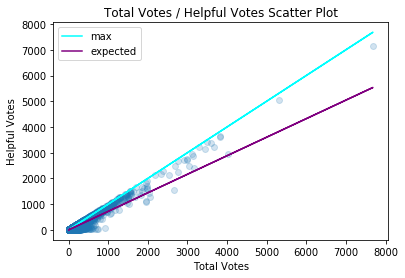

In [40]:
# Generate plot comparing helpful votes and total votes

# Define x and y
y = df['Helpful_Votes']
x = df['Total_Votes']

# Create labels
plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Total Votes / Helpful Votes Scatter Plot')

# Create plot
plt.scatter(x,y,alpha=0.2)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'purple', label='expected')

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Show plot
plt.show()

This is beautifully linear!! Data points with lots of votes are generally more helpful than expected. 

### Zoom in on Total Votes

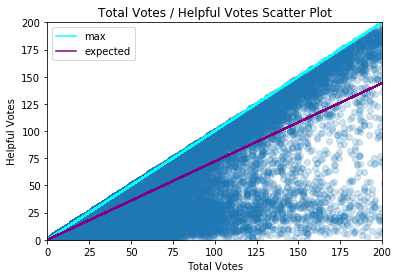

In [41]:
# Generate zoomed plot comparing helpful votes and total votes

# Define x and y
y = df['Helpful_Votes']
x = df['Total_Votes']

# Create labels
plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Total Votes / Helpful Votes Scatter Plot')

# Create plot
plt.scatter(x,y,alpha=0.2)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'purple', label='expected')

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Set limits
plt.xlim(0,200)
plt.ylim(0,200)

# Show plot
plt.show()

When Total Votes are low, the data is less clear. This is very dense.

## Plot helpful votes v unhelpful votes

I will create a plot whose points could fall anywhere. Comparing total votes to helpful votes eliminates half of the axis.

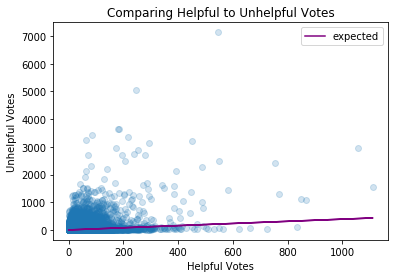

In [42]:
# Create Helpful V Unhelpful Plot

# Define x and y
y = df['Helpful_Votes']
x = df['Total_Votes'] - df['Helpful_Votes']

# Create plot
plt.scatter(x,y, alpha=0.2)

# Create title and labels
plt.title('Comparing Helpful to Unhelpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')

# Create expected line
expectedLine, = plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'purple', label='expected')

# Define legend
plt.legend(handles=[expectedLine])

# Show plot
plt.show()

This plot is very clustered near the origin. The pattern is less clear.

## Helpful v Unhelpful Subplots

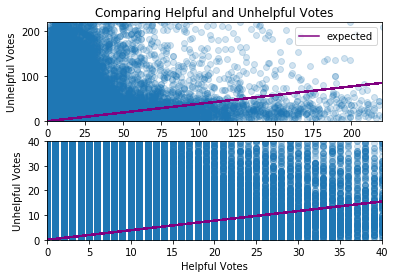

In [43]:
plt.subplot(2,1,1)
y = df['Helpful_Votes']
x = df['Total_Votes'] - df['Helpful_Votes']
plt.scatter(x,y, alpha=0.2)
expectedLine, = plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'purple', label='expected')
plt.legend(handles=[expectedLine])
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.title('Comparing Helpful and Unhelpful Votes')
plt.xlim(0,220)
plt.ylim(0,220)

plt.subplot(2,1,2)
y = df['Helpful_Votes']
x = df['Total_Votes'] - df['Helpful_Votes']
plt.scatter(x,y, alpha=0.2)
plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'purple')
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.xlim(0,40)
plt.ylim(0,40)

plt.tight_layout
plt.show()

The pattern indcates that as helpful votes go up, unhelpful votes go down.

### Scatter Plot: Length of Review v Percentage of Helpful Votes

Since percentage of helpful votes is only relevant when votes have been cast, I need a reduced array of review length to match.

#### Generating Plot

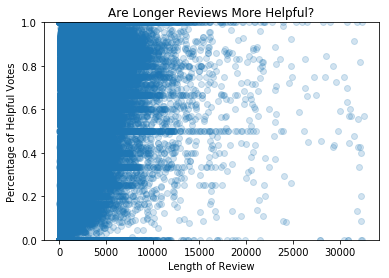

In [44]:
x = df['Review_Length']
y = df['Helpful_Percentage']
plt.title('Are Longer Reviews More Helpful?')
plt.ylim(0,1)
plt.xlabel('Length of Review')
plt.ylabel('Percentage of Helpful Votes')
plt.scatter(x,y, alpha=0.2)
plt.show()

 There appears to be a slight positive correlation between the length of review and it's percentage of helpful votes.

## Correlation Coefficient

## Display Histograms

### All Rows

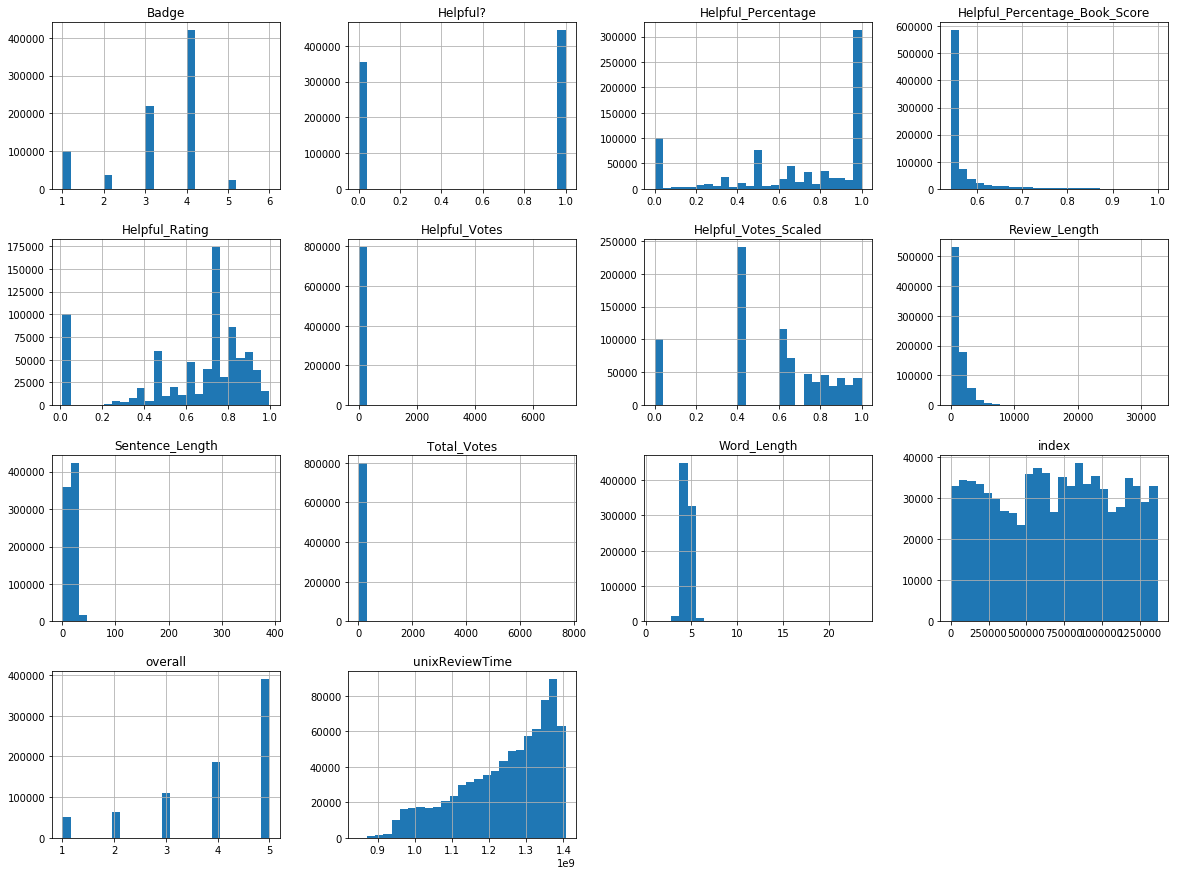

In [45]:
# Show plots inline
%matplotlib inline

#Import matplotlib
import matplotlib.pyplot as plt

# Create histograms for all numberical columns, set number of bins and size
df.hist(bins=25, figsize=(20,15))

# Show plot
plt.show()

df_5 and df_10 have similar graphs. The change in distribution of the overall rating and the helpful_rating are interesting. The helpful rating is the smoothest for df_10. My choice going forward will be df_10.

## Helpful_Rating

### Correlation Matrix

In [46]:
corr_matrix = df.corr()
corr_matrix['Helpful_Rating'].sort_values(ascending=False)

Helpful_Rating                   1.000000
Badge                            0.963651
Helpful_Percentage               0.939394
Helpful_Votes_Scaled             0.824260
Helpful?                         0.750482
Helpful_Percentage_Book_Score    0.324381
Review_Length                    0.230679
Word_Length                      0.169328
Sentence_Length                  0.168519
Helpful_Votes                    0.168088
Total_Votes                      0.130645
overall                          0.105364
index                           -0.015235
unixReviewTime                  -0.214078
Name: Helpful_Rating, dtype: float64

Review_Length, Sentence_Length, Word_Length and overall should all be considered as they had nothing to do with the creation of the Helpful_Rating column.

### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120f636a0>,
      dtype=object)

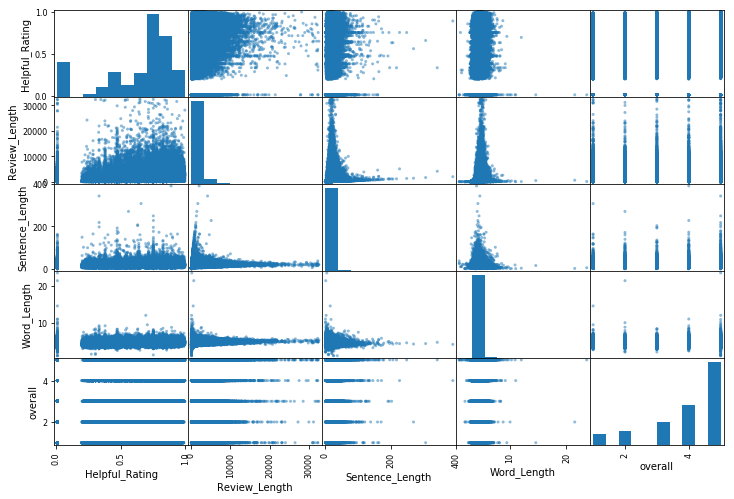

In [47]:
from pandas.plotting import scatter_matrix

attributes = ['Helpful_Rating', 'Review_Length', 'Sentence_Length', 'Word_Length', 'overall']
scatter_matrix(df[attributes], figsize=(12,8))

## Initial Summary

I am looking for criteria to rank the helpfulness of reviews and reviewers. The next logical step is to group the data by reviewerID and look for any trends. The data clearly shows that users are more likely to vote for a review if they find it helpful. This should prove instrumental for training data to determine the helpfulness of a given review.

## Questions Going Forward

1) What other criterion can be used to determine the helpfulness of reviews?

2) What model can I create to generate a single number to rank how helpful reviews are?

3) What trends will grouping by reviewerID reveal?

4) What will grouping by time series stamp reveal?

5) Are the words themselves, or sentence length of each review worth examining?

## Model Notes

I have been operating under the assumption that the data is honest. This may not be the case. There is a wealth of information online targeting "fake" reviews (references forthcoming). What determines a fake review? While there is no clear blueprint, here are some initial ideas:

1) Brief reviews.

2) All reviews written in a very short timeframe.

3) Indicative language (more research needed).

There also a spectrum here. Emotional reviews, dishonest reviews, subjective reviews, provacative reviews, objective reviews, paid reviews, reviews with an agenda, etc.

It may difficult to ferret all of these outs. However, it is possible to construct a model that identifies the patterns of reviewers and ranks them accordingly.

1) Percentage of helpfulness.
2) Duration of account since first review.
3) Account activity.
4) Mean review score. 

These will each be reviewed going forward.